<a href="https://colab.research.google.com/github/vvilliscool/study_kaggle/blob/master/goorm_20220804_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/content/drive/MyDrive/goorm_project_class/data/t-academy/train (1).csv") 
test = pd.read_csv("/content/drive/MyDrive/goorm_project_class/data/t-academy/test (1).csv") 
sub = pd.read_csv("/content/drive/MyDrive/goorm_project_class/data/t-academy/sample_submission.csv") 

train.shape, test.shape, sub.shape

((26049, 16), (6512, 15), (6512, 2))

In [3]:
train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [4]:
test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [5]:
train.income.unique()

array(['>50K', '<=50K'], dtype=object)

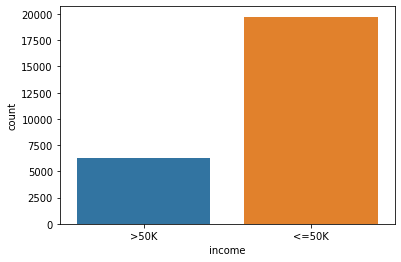

In [6]:
sns.countplot(x="income", data=train)

# 라벨 인코딩

In [7]:
train.loc[ train['income']=='>50K' , 'target'] = 1
train.loc[ train['income']=='<=50K' , 'target'] = 0
train['target'] = train.target.astype("int")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
 16  target          26049 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 3.4+ MB


In [9]:
sel = ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

X = train[sel]
y = train['target']

test_X = test[sel]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=train.target,
                                                   random_state=42)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19536, 7) (6513, 7) (19536,) (6513,)


# Baseline 모델 만들기

## Logistic 모델

In [11]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

print("학습용 : ", model_lr.score(X_train, y_train) )
print("테스트용 : ", model_lr.score(X_test, y_test) )

학습용 :  0.7971437346437347
테스트용 :  0.7996315062183326


## RandomForest 모델

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

print("학습용 : ", model_rf.score(X_train, y_train) )
print("테스트용 : ", model_rf.score(X_test, y_test) )

학습용 :  1.0
테스트용 :  0.8326424074927069


In [13]:
pred_lr = model_lr.predict(X_test)

In [14]:
pred_rf = model_rf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr, target_names=['<-50K','>50K']))

              precision    recall  f1-score   support

       <-50K       0.81      0.97      0.88      4937
        >50K       0.74      0.27      0.39      1576

    accuracy                           0.80      6513
   macro avg       0.77      0.62      0.64      6513
weighted avg       0.79      0.80      0.76      6513



In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf, target_names=['<-50K','>50K']))

              precision    recall  f1-score   support

       <-50K       0.85      0.94      0.90      4937
        >50K       0.73      0.49      0.58      1576

    accuracy                           0.83      6513
   macro avg       0.79      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



In [18]:
from sklearn.metrics import confusion_matrix
matrix_lr = confusion_matrix(y_test, pred_lr)
matrix_lr

array([[4789,  148],
       [1157,  419]])

In [19]:
from sklearn.metrics import confusion_matrix
matrix_rf = confusion_matrix(y_test, pred_rf)
matrix_rf

array([[4655,  282],
       [ 808,  768]])